# Project WordCloud

The goal of the project is to create a word cloud. A word cloud is an image that's made up of different sized words. Usually the sizes of the words are determined by how many times each word appears in a specific text. To create the image itself, we're going to use an external Python module called creatively Word cloud. Your job is to create a script that would go through the text and count how many times each word appears. We've done this a few times already, any ideas how we should tackle this one? If you're thinking of using a dictionary to count how many times each word appears, then. Ding ding ding, good answer! You're going to prepare a dictionary and use that as a parameter for the word cloud module, not too tricky, right? I think you can handle a little more, so two things you have to watch out for. One, punctuation marks, before counting the frequency of the words, you need to make sure that there are no punctuation marks in the text. If you don't, a string example with a comma at the end would be different from a string example with a dot at the end. So before you put words into the dictionary, you have to clean up the text to remove any punctuation marks. And the second thing we want to keep our word cloud interesting. Certain words in our language crop up a lot and if we include all of these we're going to get a pretty dull word cloud. Think about words like, the, two or if. They usually appear a whole lot in text but aren't too relevant to the text's overall message. We want our Cloud to show words that are relevant to the text we're using for the input. So you need to find a way to exclude irrelevant or uninteresting words when processing the text. For the input, you're going to upload a text file. You can choose any text file you like for your input. It could be the contents of a website, a full novel or even everything that one author has ever written. You just need to make sure that it's one text file, so that it can be processed by the code. Okay, before jumping into the project, remember you can re-watch this video If something isn't clear. Yep, I'm starting to sound like a broken record, but this time it's extra extra important. This final project is the real test of how much you've gotten your head around and can highlight areas you need to brush up on. So we want you to be super clear on what you need to do on that point.

##### Project goal
Create a dictionary with words and word frequencies that can be passed to the generate_from_frequencies function of the WordCloud class.

Once you have the dictionary, use this code to generate the word cloud image:

In [ ]:
cloud = wordcloud.WordCloud()
cloud.generate_from_frequencies(frequencies)
cloud.to_file("myfile.jpg")

##### Things to remember
Before processing any text, you need to remove all the punctuation marks. To do this, you can go through each line of text, character-by-character, using the isalpha() method. This will check whether or not the character is a letter. To split a line of text into words, you can use the split() method. Before storing words in the frequency dictionary, check if they’re part of the "uninteresting" set of words (for example: "a", "the", "to", "if"). Make this set a parameter to your function so that you can change it if necessary. Input file For the input file, you need to provide a file that contains text only. For the text itself, you can copy and paste the contents of a website you like. Or you can use a site like Project Gutenberg to find books that are available online. You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen.

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\sp\anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\sp\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\sp\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\sp\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


IMPORTANT! If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above, select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.

To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `pythoncrash.txt` (181.07 kB)


The uploader widget saved the contents of your uploaded file into a string object named file_contents that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script.

Write a function in the cell below that iterates through the words in file_contents, removes punctuation, and counts the frequency of each word. Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the". Then use it in the generate_from_frequencies function to generate your very own word cloud!

Hint: Try storing the results of your iteration in a dictionary before passing them into wordcloud via the generate_from_frequencies function.

In [3]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    word_count = {}
    final_text = []

    for word in file_contents.split():
        text = ""
        for letter in word.lower():
            if letter not in punctuations and letter.isalpha():
                text += letter
        if word not in uninteresting_words:
            final_text.append(text)
    
    for word in final_text:
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1
            
        
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(word_count)
    return cloud.to_array()

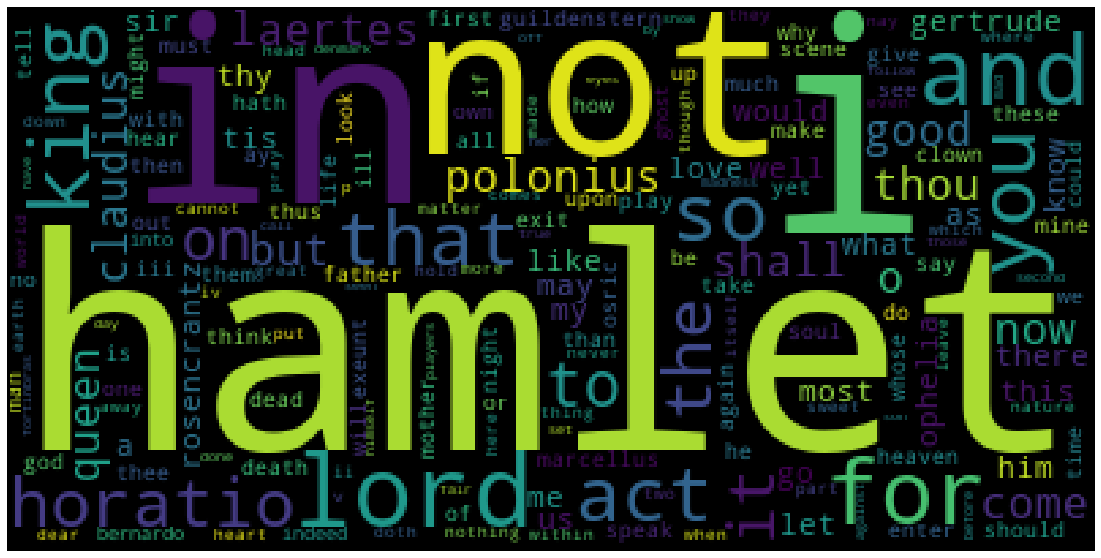

In [4]:
# Display your wordcloud image
plt.figure(figsize=(20,10))
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your calculate_frequencies function until you get the desired output. Definitely check that you passed your frequecy count dictionary into the generate_from_frequencies function of wordcloud. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!